In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
import pandas as pd
%matplotlib inline
df = pd.read_csv("../input/sms-spam-collection-dataset/spam.csv",encoding="ISO-8859-1")
df.rename(columns={'v1':'class_label','v2':'message'},inplace=True)
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
#getting to know the dataset
df['class_label'].value_counts()

ham     4825
spam     747
Name: class_label, dtype: int64

<AxesSubplot:>

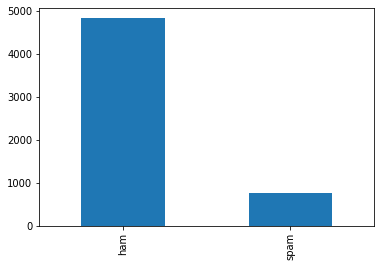

In [4]:
#bar chart of the dataset
df['class_label'].value_counts().plot(kind='bar')



In [5]:
df_spam = df[df.class_label=='spam']
df_spam

,class_label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [6]:
spam_list = df_spam['message'].to_list()
filtered_spam = ''
for i in spam_list:
    filtered_spam = filtered_spam+''+i
filtered_spam = filtered_spam.lower()

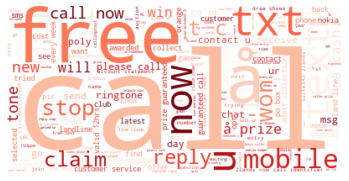

In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from PIL import Image
#comment_mask = np.array(Image.open("comment.jpg"))
word_cloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_spam)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

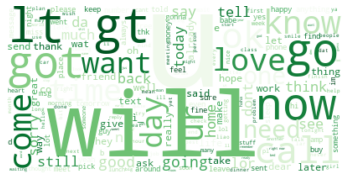

In [8]:
df_ham = df[df.class_label=='ham']
df_ham
ham_list = df_ham['message'].to_list()
filtered_ham = ''
for i in ham_list:
    filtered_ham = filtered_ham+''+i
filtered_ham = filtered_ham.lower()

import os
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from PIL import Image
#comment_mask = np.array(Image.open("comment.jpg"))
word_cloud1 = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_ham)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

[comment.jpg](https://thumbs.dreamstime.com/b/imitation-transparent-background-seamless-vector-illustration-69028332.jpg)

In [9]:
df['class_label'] = df['class_label'].apply(lambda x: 1 if x == 'spam' else 0)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['message'],df['class_label'],test_size=0.3,random_state=0)
print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))

rows in test set: (1672,)
rows in train set: (3900,)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
lst = x_train.tolist()
vectorizer = TfidfVectorizer(
input= lst ,  # input is the actual text
lowercase=True,      # convert to lowercase before tokenizing
stop_words='english' # remove stop words
)
features_train_transformed = vectorizer.fit_transform(lst) #gives tf idf vector for x_train
features_test_transformed  = vectorizer.transform(x_test) #gives tf idf vector for x_test

In [12]:
from sklearn.naive_bayes import MultinomialNB
# train the model
classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)
print("classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

classifier accuracy 96.41%


In [13]:
labels = classifier.predict(features_test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1434    0]
 [  60  178]]
Accuracy Score : 0.9641148325358851
Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1434
           1       1.00      0.75      0.86       238

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.96      0.96      1672

F-Measure: 0.856


<AxesSubplot:>

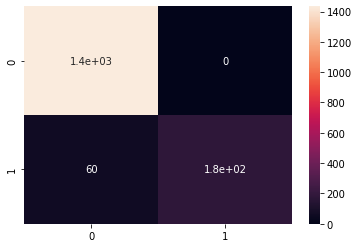

In [14]:
import seaborn as sns
sns.heatmap(results,annot=True)